In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import openweathermapy.core as owm
import requests
import json
import time
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [3]:
cities = pd.DataFrame(cities)
cities.rename(columns={0: 'City'},inplace=True)
cities['Cloudiness (%)'] = np.nan
cities['Country'] = np.nan
cities['Date'] = np.nan
cities['Humidity'] = np.nan
cities['Lat'] = np.nan
cities['Lng'] = np.nan
cities['Max Temp (°F)'] = np.nan
cities['Wind Speed (mph)'] = np.nan
cities.head()

,City,Cloudiness (%),Country,Date,Humidity,Lat,Lng,Max Temp (°F),Wind Speed (mph)
0,christchurch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,butaritari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,klaksvik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,georgetown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,adrar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
params = {
    "appid": api_key,
    "units": "imperial"
}

In [5]:
params["q"] = cities['City'][0]
response = requests.get(base_url, params=params)
response_json = response.json()
print(response.url)

http://api.openweathermap.org/data/2.5/weather?appid=36204467d62a1b9515744a91fa0cfe8c&units=imperial&q=christchurch


In [6]:
cities.loc[[0],'Cloudiness (%)'] = response_json['clouds']['all']
cities.loc[[0],'Country'] = response_json['sys']['country']
date = datetime.datetime.fromtimestamp(int(response_json['dt'])).strftime('%m-%d-%Y')
cities.loc[[0],'Date'] = date
cities.loc[[0],'Humidity'] = response_json['main']['humidity']
cities.loc[[0],'Lat'] = response_json['coord']['lat']
cities.loc[[0],'Lng'] = response_json['coord']['lon']
cities.loc[[0],'Max Temp (°F)'] = response_json['main']['temp_max']
cities.loc[[0],'Wind Speed (mph)'] = response_json['wind']['speed']
cities.head()

,City,Cloudiness (%),Country,Date,Humidity,Lat,Lng,Max Temp (°F),Wind Speed (mph)
0,christchurch,100.0,NZ,09-13-2019,100.0,-43.53,172.64,46.99,9.17
1,butaritari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,klaksvik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,georgetown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,adrar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# use iterrows to iterate through pandas dataframe
for index, row in cities.iterrows():

    # get city name from the dataframe
    city_name = row['City']

    # add keyword to params dict
    params['q'] = city_name

    # assemble url and make API request
    print(f"Making request number {index} for city {city_name}")
    response = requests.get(base_url, params=params).json()   
    
#     results = response['results']
    
    try:
        cities.loc[[index],'Cloudiness (%)'] = response['clouds']['all']
        cities.loc[[index],'Country'] = response['sys']['country']
        date = datetime.datetime.fromtimestamp(int(response['dt'])).strftime('%m-%d-%Y')
        cities.loc[[index],'Date'] = date
        cities.loc[[index],'Humidity'] = response['main']['humidity']
        cities.loc[[index],'Lat'] = response['coord']['lat']
        cities.loc[[index],'Lng'] = response['coord']['lon']
        cities.loc[[index],'Max Temp (°F)'] = response['main']['temp_max']
        cities.loc[[index],'Wind Speed (mph)'] = response['wind']['speed']
    
    except:
        print("Skipping City ...")

Making request number 0 for city christchurch
Making request number 1 for city butaritari
Making request number 2 for city klaksvik
Making request number 3 for city georgetown
Making request number 4 for city adrar
Making request number 5 for city kapaa
Making request number 6 for city punta arenas
Making request number 7 for city esmeraldas
Making request number 8 for city hermanus
Making request number 9 for city putina
Making request number 10 for city quatre cocos
Making request number 11 for city airai
Making request number 12 for city burnie
Making request number 13 for city luoyang
Making request number 14 for city east london
Making request number 15 for city khatanga
Making request number 16 for city am timan
Making request number 17 for city arraial do cabo
Making request number 18 for city cape town
Making request number 19 for city saldanha
Making request number 20 for city dondo
Making request number 21 for city ribeira grande
Making request number 22 for city huainan
Maki

Making request number 178 for city grootfontein
Making request number 179 for city lebu
Making request number 180 for city westport
Making request number 181 for city havelock
Making request number 182 for city oktyabrskiy
Making request number 183 for city tasiilaq
Making request number 184 for city namatanai
Making request number 185 for city pando
Making request number 186 for city kalianget
Making request number 187 for city soria
Making request number 188 for city saint-philippe
Making request number 189 for city khilok
Making request number 190 for city victoria
Making request number 191 for city dzaoudzi
Making request number 192 for city puerto lumbreras
Making request number 193 for city san andres
Making request number 194 for city skibbereen
Making request number 195 for city mys shmidta
Skipping City ...
Making request number 196 for city mokhsogollokh
Making request number 197 for city altotting
Making request number 198 for city victoria point
Making request number 199 fo

Making request number 354 for city mortka
Making request number 355 for city emerald
Making request number 356 for city volsk
Making request number 357 for city manjacaze
Making request number 358 for city alvarado
Making request number 359 for city elmina
Making request number 360 for city bereda
Making request number 361 for city samarai
Making request number 362 for city berlevag
Making request number 363 for city itarema
Making request number 364 for city berberati
Making request number 365 for city abu samrah
Making request number 366 for city mwanza
Making request number 367 for city fort-shevchenko
Making request number 368 for city palabuhanratu
Skipping City ...
Making request number 369 for city aksha
Making request number 370 for city bambanglipuro
Making request number 371 for city loding
Making request number 372 for city usakos
Making request number 373 for city wahran
Skipping City ...
Making request number 374 for city calderitas
Making request number 375 for city kalmu

Making request number 532 for city chekalin
Making request number 533 for city saint-joseph
Making request number 534 for city camacha
Making request number 535 for city changli
Making request number 536 for city jepara
Making request number 537 for city wulanhaote
Skipping City ...
Making request number 538 for city kormilovka
Making request number 539 for city miracema do tocantins
Making request number 540 for city pitimbu
Making request number 541 for city kamenka
Making request number 542 for city gilgit
Making request number 543 for city nizhniy tsasuchey
Making request number 544 for city margate
Making request number 545 for city gap
Making request number 546 for city umea
Making request number 547 for city ixtapa
Making request number 548 for city lolua
Skipping City ...
Making request number 549 for city kawanoe
Making request number 550 for city qostanay
Making request number 551 for city ankazoabo
Making request number 552 for city uvinza
Making request number 553 for city 

In [8]:
cities.to_csv('cities.csv')
cities.head()

,City,Cloudiness (%),Country,Date,Humidity,Lat,Lng,Max Temp (°F),Wind Speed (mph)
0,christchurch,100.0,NZ,09-13-2019,100.0,-43.53,172.64,46.99,9.17
1,butaritari,0.0,KI,09-13-2019,65.0,3.07,172.79,83.41,2.46
2,klaksvik,94.0,FO,09-13-2019,81.0,62.23,-6.59,50.00,21.92
3,georgetown,20.0,GY,09-13-2019,66.0,6.80,-58.16,87.80,13.87
4,adrar,40.0,DZ,09-13-2019,16.0,27.87,-0.29,95.00,5.82


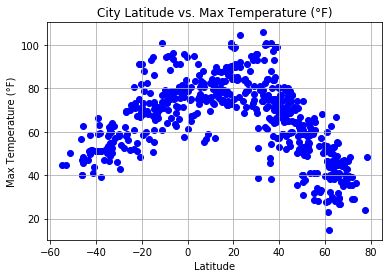

In [17]:
# City Lat vs Max Temp
plt.scatter(cities['Lat'], cities['Max Temp (°F)'], marker="o", facecolors="blue")
plt.title("City Latitude vs. Max Temperature (°F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid()
plt.savefig("CityLatVsMaxTemp.png")
plt.show()

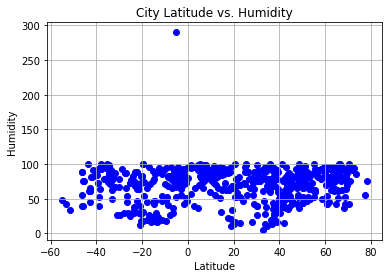

In [22]:
# City Lat vs Humidity
plt.scatter(cities['Lat'], cities['Humidity'], marker="o", facecolors="blue")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("CityLatVsHumidity.png")
plt.show()

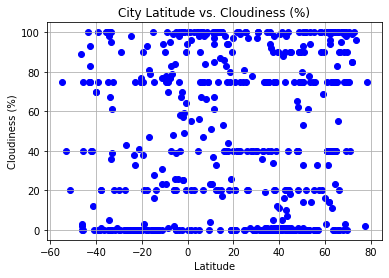

In [19]:
# City Lat vs. Cloudiness
plt.scatter(cities['Lat'], cities['Cloudiness (%)'], marker="o", facecolors="blue")
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("CityLatVsCloudiness.png")
plt.show()

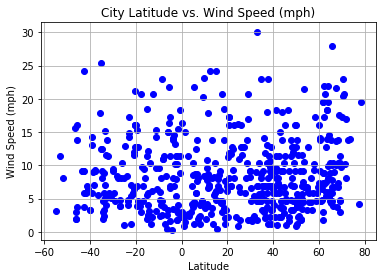

In [20]:
# City Lat vs. Wind Speed
plt.scatter(cities['Lat'], cities['Wind Speed (mph)'], marker="o", facecolors="blue")
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("CityLatVsWind Speed.png")
plt.show()

# Three observations
1. The closer a city is to 0 degrees Lat, the higher the Max Temp for the city.
2. % Cloudiness is generally reported in 0%, 20%, 40%, 75% and 100%.
3. Humidity and windspeed appear to be independant of latitidue.